In [1]:
%matplotlib inline

In [54]:
import scipy.io.wavfile as wavfile
import scipy
import scipy.fftpack
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = 15,5
from IPython.display import Audio

In [25]:
filename = 'spring.wav'

In [28]:
# sps: samples per second == sampling rate
sps, signal = wavfile.read(filename)
Audio (filename)

In [29]:
print (f'signal is {signal.size/sps:.2f} seconds long')
sps, type(signal), signal.shape, signal.size, signal.size/sps

signal is 0.51 seconds long


(22050, numpy.ndarray, (11136,), 11136, 0.5050340136054422)

In [30]:
print (f'Bit rate of the signal is {16*sps} bits per seconds')

Bit rate of the signal is 352800 bits per seconds


In [31]:
signal[:10], signal[-10:], signal.max(), signal.min()

(array([-520, -146,  362,  656,  536,   64, -482, -796, -726, -370],
       dtype=int16),
 array([-14,  -8,   0,  11,  26,  45,  68,  95, 125, 159], dtype=int16),
 27120,
 -29338)

Text(0.5, 0, 'seconds')

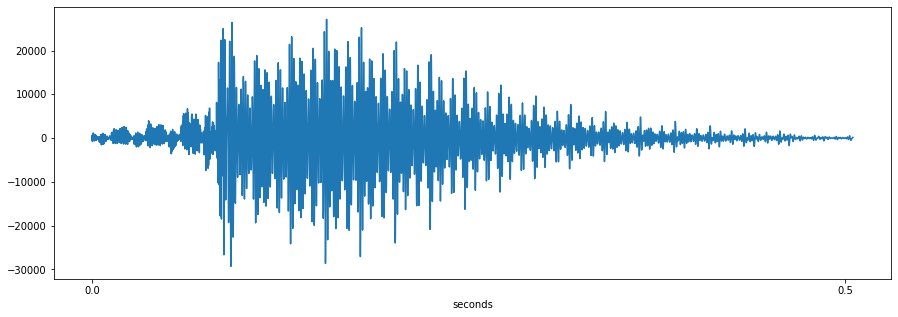

In [55]:
#def plotwave (sps, signal):
frames = scipy.arange(signal.size)
plt.plot (frames, signal)
locs, labels = plt.xticks (scipy.arange(0, signal.size, 0.5*sps), scipy.arange(0, signal.size/sps, 0.5) )
plt.xlabel('seconds')

In [82]:
def plotwave (sps, signal,tick='sec', tickint=0.01):
    frames = scipy.arange(signal.size)
    plt.plot (frames, signal)
    if tick == 'sec':
        locs, labels = plt.xticks (scipy.arange(0, signal.size, tickint*sps), scipy.arange(0, signal.size/sps, tickint) )
        plt.xlabel('seconds')
    else:
        plt.xlabel('sample index')

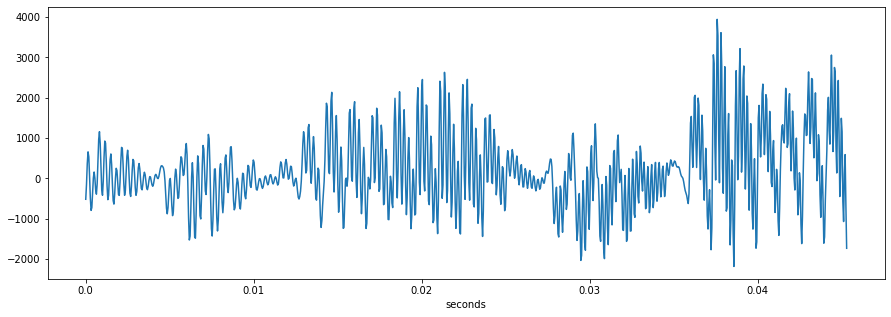

In [83]:
plotwave (sps, signal[:1000])

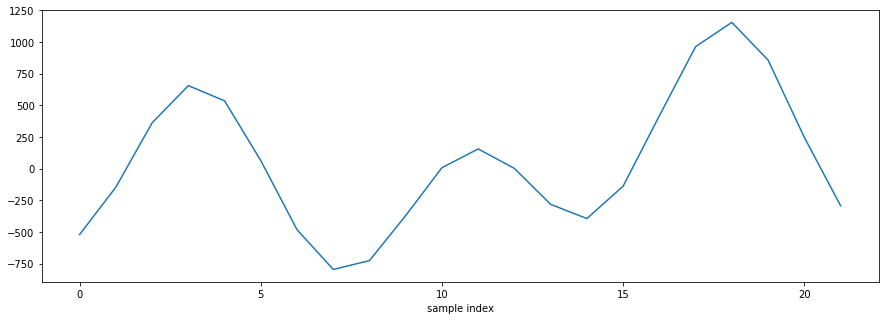

In [84]:
plotwave(sps, signal[:sps//1000], tick=None)

# Sine waves and frequencies

In [179]:
note2freq = {'C4': 261.6, 'D4':293.7, 'E4':329.6, 'F4':349.2, 'G4':392.0, 'A4':440.0, 'B4':493.9, 'C5':523.3} # in Hz = repeats per seconds

# basic parameters
duration = .5 # seconds
fs = 10000 # samples per second 
sampling_time_interval = 1./fs
frames = scipy.arange(duration*fs) # samples
amplitude = 1

note2signal = {}
for note in note2freq:
    freq = note2freq[note]
    note2signal[note] = []
    for i in range (int(fs*duration)):
        t = i * sampling_time_interval
        note2signal[note].append( amplitude * scipy.sin(2*scipy.pi*freq*t) )
    note2signal[note] = np.array(note2signal[note])
#
note2signal['sp'] = scipy.ones(int(duration*fs/4))

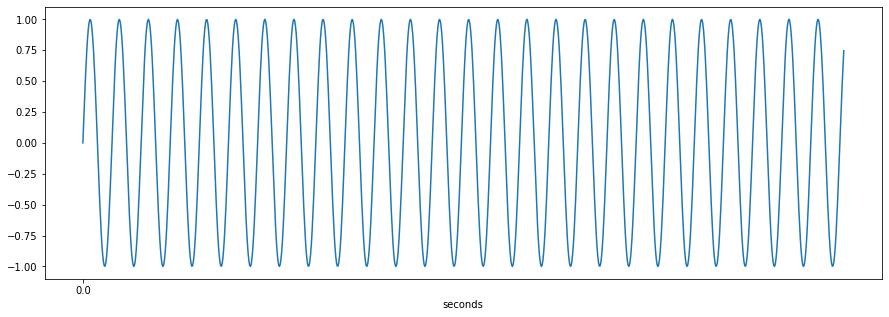

In [180]:
plotwave (fs, note2signal['C4'][:1000], tickint=0.1)

In [128]:
scipy.io.wavfile.write ('sine-C4.wav', fs, note2signal['C4'])
Audio('sine-C4.wav')

In [129]:
# twinkle twinkle little star
twinkle = scipy.hstack([note2signal[note] for note in 'sp C4 sp C4 sp G4 sp G4 sp A4 sp A4 sp G4'.split()])
scipy.io.wavfile.write('twinkle.wav', fs, twinkle)
Audio('twinkle.wav')

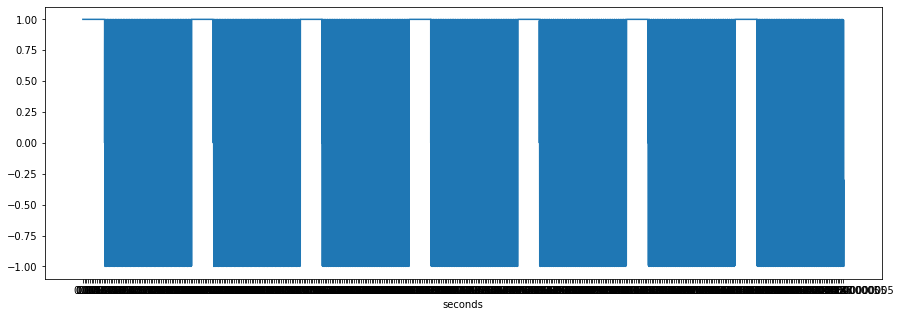

In [130]:
plotwave(fs, twinkle)

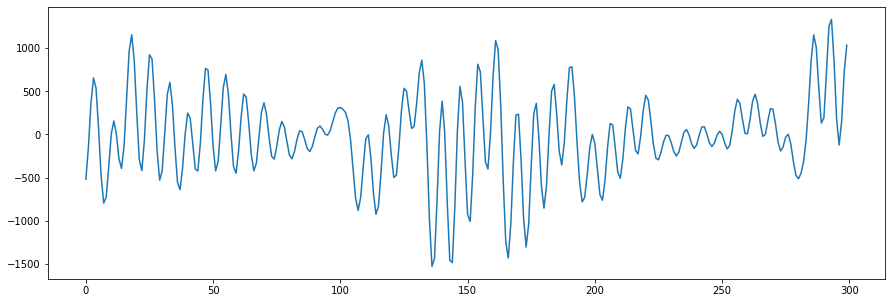

In [144]:
plt.plot(signal[:300])

In [189]:
signalc4 = note2signal['C4']
N = 2**14
fft_result = scipy.fft (signalc4, n=N)
fft_result.shape, signal.shape, note2freq['C4']

((16384,), (11136,), 261.6)

In [190]:
fft_result[1]

(6.558741443839154+1.3123719342799225j)

In [192]:
xf = np.linspace(0, 1./(2*sampling_time_interval))
plt.plot(np.abs(xf, fft_result[0:N//2]))

ValueError: operands could not be broadcast together with shapes (50,) (8192,) 

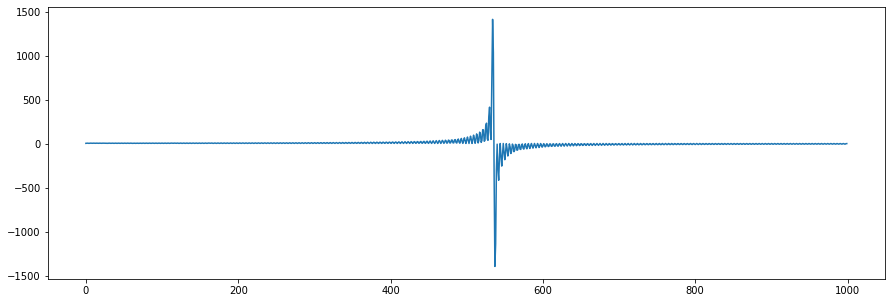

In [173]:
plt.plot (fft_result.real[:1000])

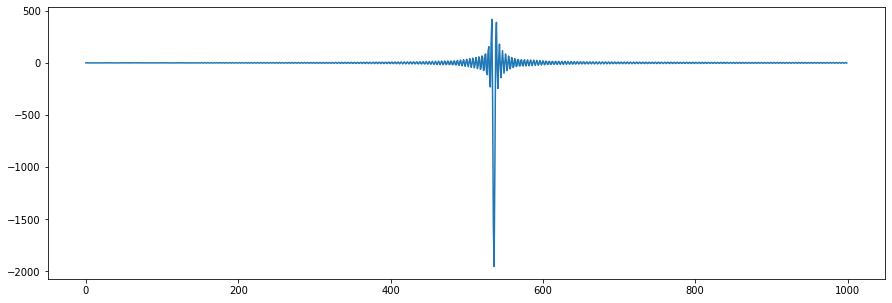

In [174]:
plt.plot (fft_result.imag[:1000])

In [162]:
sp = np.fft.fft (np.sin(np.arange(256)))
print(type(sp), sp.shape, sp.real.shape, sp.imag.shape, sp.real[:4], sp.imag[:4])

<class 'numpy.ndarray'> (256,) (256,) (256,) [1.45126613 1.45189004 1.45376631 1.45690866] [0.         0.02668914 0.05346734 0.08042474]


In [164]:
sp[1]

(1.451890038302551+0.02668913675029308j)

In [159]:
print(signal.real[:4], signal.imag[:4])

[-520 -146  362  656] [0 0 0 0]


In [158]:
signal[:8]

array([-520, -146,  362,  656,  536,   64, -482, -796], dtype=int16)

In [156]:
a = np.array([1+2j, 3+4j, 5+6j])
a

array([1.+2.j, 3.+4.j, 5.+6.j])

In [ ]:
print ("Frequency sampling", fs_rate)
l_audio = len(signal.shape)
print ("Channels", l_audio)
if l_audio == 2:
    signal = signal.sum(axis=1) / 2
N = signal.shape[0]
print ("Complete Samplings N", N)
secs = N / float(fs_rate)
print ("secs", secs)
Ts = 1.0/fs_rate # sampling interval in time
print ("Timestep between samples Ts", Ts)
t = scipy.arange(0, secs, Ts) # time vector as scipy arange field / numpy.ndarray
FFT = abs(scipy.fft(signal))
FFT_side = FFT[range(N//2)] # one side FFT range
freqs = scipy.fftpack.fftfreq(signal.size, t[1]-t[0])
fft_freqs = np.array(freqs)
freqs_side = freqs[range(N//2)] # one side frequency range
fft_freqs_side = np.array(freqs_side)
plt.subplot(311)
p1 = plt.plot(t, signal, "g") # plotting the signal
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.subplot(312)
p2 = plt.plot(freqs, FFT, "r") # plotting the complete fft spectrum
plt.xlabel('Frequency (Hz)')
plt.ylabel('Count dbl-sided')
plt.subplot(313)
p3 = plt.plot(freqs_side, abs(FFT_side), "b") # plotting the positive fft spectrum
plt.xlabel('Frequency (Hz)')
plt.ylabel('Count single-sided')
plt.show()